# LinReg with PyTorch, Gradient Descent, and GPU

## Init, helpers, utils ...

In [1]:
%matplotlib inline

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

DEVICE = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
DEVICE

device(type='cuda', index=0)

In [3]:
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
from IPython.core.debugger import set_trace

# The Problem

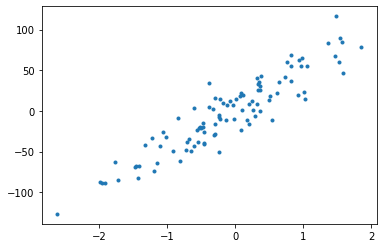

In [4]:
from sklearn.datasets import make_regression


n_features = 1
n_samples = 100

X, y = make_regression(
    n_samples=n_samples,
    n_features=n_features,
    noise=20,
    random_state=42,
)

fix, ax = plt.subplots()
ax.plot(X, y, ".")

# The Solution

In [5]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y.reshape((n_samples, n_features))).float()

In [6]:
class LinReg(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.beta = nn.Linear(input_dim, 1)
        
    def forward(self, X):
        return self.beta(X)

# or just
# model = nn.Linear(input_dim, 1)

In [7]:
model = LinReg(n_features).to(DEVICE)  # <-- here
loss_fn = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)


X, y = X.to(DEVICE), y.to(DEVICE)  # <-- here

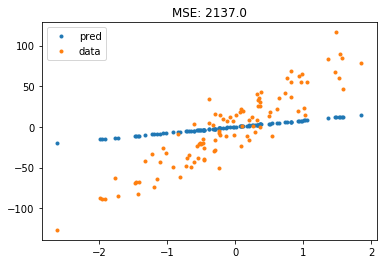

In [8]:
# Train step
model.train()  # <-- here
optimizer.zero_grad()

y_ = model(X)
loss = loss_fn(y_, y)

loss.backward()
optimizer.step()

# Eval
model.eval()  # <-- here
with torch.no_grad():
    y_ = model(X)    

# Vis
fig, ax = plt.subplots()
ax.plot(X.cpu().numpy(), y_.cpu().numpy(), ".", label="pred")
ax.plot(X.cpu().numpy(), y.cpu().numpy(), ".", label="data")
ax.set_title(f"MSE: {loss.item():0.1f}")
ax.legend();

Note: I did gradient descent with all the data. I did not split the data into `train` and `valid` which should be done!

In [9]:
list(range(100))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99]

# Exercise:
- Write a proper training loop for this linear regression example.
- Split data into train and valid.
- Use the Dataset and DataLoader abstraction.
- Create a logistic regression module.
- Create a Multi Layer Perceptron (MLP).